In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
cleaned_train_labels = pd.read_pickle( '../cleaned_train.pkl')
cleaned_train_labels # --> train

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,False,False,False,False,False,False,False,False,False,False
1,28830,2,8,900,2812,2,10,8,7,o,...,False,False,False,False,False,False,False,False,False,False
2,94947,3,21,363,8973,2,10,5,5,t,...,False,False,False,False,False,False,False,False,False,False
3,590882,2,22,418,10694,2,10,6,5,t,...,False,False,False,False,False,False,False,False,False,False
4,201944,3,11,131,1488,3,30,8,9,t,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,n,...,False,False,False,False,False,False,False,False,False,False
260597,669485,3,17,715,2060,2,0,6,5,t,...,False,False,False,False,False,False,False,False,False,False
260598,602512,3,17,51,8163,3,55,6,7,t,...,False,False,False,False,False,False,False,False,False,False
260599,151409,2,26,39,1851,2,10,14,6,t,...,False,False,False,False,False,False,False,False,False,False


In [2]:
one_hot = pd.get_dummies(cleaned_train_labels)
one_hot = one_hot.set_index('building_id')

NameError: name 'pd' is not defined

In [4]:
X = one_hot.drop(columns=['damage_grade'])
y = one_hot['damage_grade']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [6]:
%%time
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)


CPU times: user 36.5 s, sys: 383 ms, total: 36.9 s
Wall time: 37.4 s


RandomForestClassifier(random_state=1)

In [7]:
preds = rf_model.predict(X_test)
f1_score(y_test, preds, average='micro') 

0.710794922564504

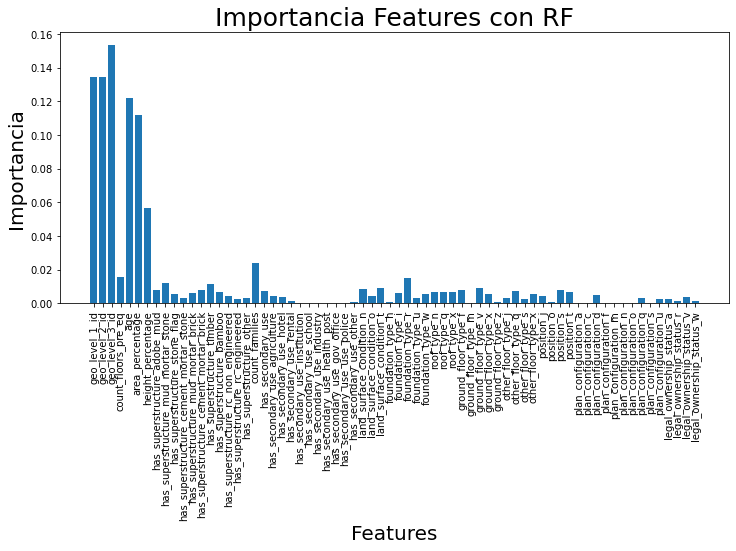

In [8]:
rf_model.feature_importances_.tolist()
pd.DataFrame(X_train)
plt.figure(figsize = (12, 5))
plt.bar(pd.DataFrame(X_train).columns, rf_model.feature_importances_)
plt.xlabel('Features', fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel('Importancia', fontsize = 20)
plt.title('Importancia Features con RF', fontsize = 25)
plt.show()

In [15]:
pd.DataFrame(X_train).columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'land_surface_condition_n',
       'land_surface_condition_o', 'land_surface_condition_t',
       'foundation_type_h', 'foundation_type_i', 'foundation_type_r',
       'foundation_type_u', 'foundation_type_w', 'roof_type_n', 'roof_type_q',
       'roof_type_x', 'ground_floor_type_f', 'ground_floor_type_m',
       'ground_floor_type_v', 'ground_floor_type_x', 'ground_floor_type_z',
       'other_f

# Con k Fold 

In [9]:

a_sacar = ['has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other', 'damage_grade']
X = one_hot.drop(columns=a_sacar)
X

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,True,True,False,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,False,True,False,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,True,False,False,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,False,True,False,...,0,0,0,1,0,0,0,0,1,0
669485,17,715,2060,2,0,6,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
602512,17,51,8163,3,55,6,7,False,True,False,...,0,0,0,0,0,0,0,0,1,0


In [10]:
y = one_hot['damage_grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [11]:
rf_model = RandomForestClassifier(random_state=42)

In [12]:
from sklearn.model_selection import KFold
# n_splits
splits = 10
kf = KFold(n_splits=splits)

In [13]:
%%time
i = 1

for train_i, test_i in kf.split(X):
    X_train, X_test = X.iloc[train_i], X.iloc[test_i]
    y_train, y_test = y.iloc[train_i], y.iloc[test_i]
    
    rf_model.fit(X_train, y_train)
    prediction_t = rf_model.predict(X_test)
    i += 1
    
X_train

CPU times: user 8min 16s, sys: 1.84 s, total: 8min 18s
Wall time: 8min 21s


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,True,True,False,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,False,True,False,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,True,False,False,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332147,4,1342,5344,2,5,8,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
1045455,10,1407,9774,2,15,7,4,False,True,False,...,0,0,0,0,0,0,0,0,1,0
248500,3,720,6629,3,25,7,8,False,True,False,...,0,0,0,0,0,0,0,0,1,0


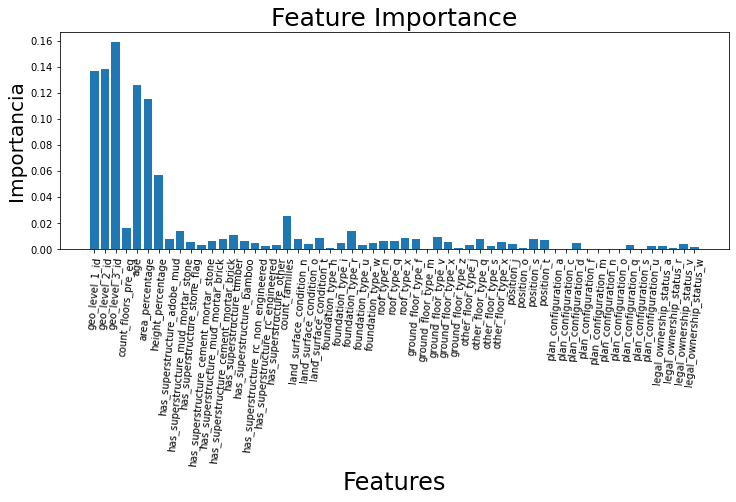

In [14]:

X_train
plt.figure(figsize=(12,4))
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features', fontsize=24)
plt.xticks(rotation = 85)
plt.ylabel('Importancia', fontsize=20)
plt.title('Feature Importance', fontsize=25)
plt.show()

In [26]:
preds = rf_model.predict(X_test)
f1_score(y_test, preds, average='micro') 

0.688449731389102

# Filtrando un poco más


In [1]:
X= one_hot[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'count_families']]
X

NameError: name 'one_hot' is not defined

In [50]:
y = one_hot['damage_grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=150)

In [48]:
rf_model = RandomForestClassifier(random_state=1)

In [51]:
from sklearn.model_selection import KFold
# n_splits   k=10: The value for k is fixed to 10, a value that has been found through experimentation to 
#generally result in a model skill estimate with low bias a modest variance.
splits = 10
kf = KFold(n_splits=splits)

In [52]:
%%time
i = 1

for train_i, test_i in kf.split(X):
    X_train, X_test = X.iloc[train_i], X.iloc[test_i]
    y_train, y_test = y.iloc[train_i], y.iloc[test_i]
    
    rf_model.fit(X_train, y_train)
    prediction_t = rf_model.predict(X_test)
    i += 1
    
X_train

CPU times: user 5min 26s, sys: 451 ms, total: 5min 26s
Wall time: 5min 28s


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,count_families
building_id,,,,,,,
802906,6,487,12198,2,30,6,1
28830,8,900,2812,2,10,8,1
94947,21,363,8973,2,10,5,1
590882,22,418,10694,2,10,6,1
201944,11,131,1488,3,30,8,1
...,...,...,...,...,...,...,...
332147,4,1342,5344,2,5,8,1
1045455,10,1407,9774,2,15,7,1
248500,3,720,6629,3,25,7,2


In [53]:
preds = rf_model.predict(X_test)
f1_score(y_test, preds, average='micro') 

0.6878357636224098